In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from imblearn.metrics import specificity_score

In [2]:
#Importing the Diabetes dataset
dataset = pd.read_csv("diabetes.csv")

In [3]:
#printing the  first 5 rows of the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Number of rows and columns in this dataset
dataset.shape

(768, 9)

In [5]:
# check the null value in this dataset
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# all columns or features in this dataset
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0--Non Diabetic and
1--Diabetic 

In [10]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# Select independent and dependent variable
X = dataset.drop(columns = 'Outcome', axis=1)
Y = dataset['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
# Feature Scaling (standardization)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [15]:
#Splitting the dataset into the training 70% and test 30 dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)


In [16]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (537, 8)
X_test shape :  (231, 8)
Y_train shape :  (537,)
Y_test shape :  (231,)


In [17]:
# SVM Model Building and training

from sklearn.svm import SVC
classifier = SVC()

classifier.fit(X_train,Y_train)

SVC()

In [18]:
#Model Evaluation
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8324022346368715


In [19]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


In [20]:
print(classification_report(X_test_prediction, Y_test))


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       176
           1       0.49      0.65      0.56        55

    accuracy                           0.75       231
   macro avg       0.68      0.72      0.69       231
weighted avg       0.79      0.75      0.76       231



In [21]:
print(confusion_matrix(X_test_prediction, Y_test))


[[138  38]
 [ 19  36]]


Heatmap report :  AxesSubplot(0.125,0.125;0.62x0.755)


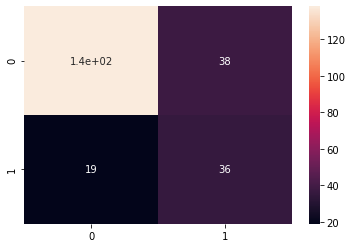

In [22]:
print("Heatmap report : ",sns.heatmap(confusion_matrix(X_test_prediction, Y_test),annot=True))

In [23]:
print("Specificity score : ",specificity_score(X_test_prediction, Y_test))
print("")
print("Roc Auc score : ",roc_auc_score(X_test_prediction, Y_test))
print("")

Specificity score :  0.7840909090909091

Roc Auc score :  0.7193181818181817

